In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
 dIncome = pd.read_csv(r"D:\IE 423\Project\ie423-2024-termproject-the-a-team\ie423-2024-termproject-the-a-team\DataSets\IncomeStats\Final_Historical_data_ISO.csv")

In [3]:
# Check column names
print("\nColumns in dIncome:")
print(dIncome.columns)


Columns in dIncome:
Index(['country', 'iso', 'GCAM_region_ID', 'year', 'REF', 'gini_reported',
       'gdp_ppp_pc_usd2011', 'population', 'Category', 'Income..net.',
       'gini_recalculated', 'Data source'],
      dtype='object')


In [4]:
# Display basic information about the dataset
print(dIncome.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85220 entries, 0 to 85219
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             85220 non-null  object 
 1   iso                 85220 non-null  object 
 2   GCAM_region_ID      85220 non-null  int64  
 3   year                85220 non-null  int64  
 4   REF                 85220 non-null  object 
 5   gini_reported       85220 non-null  object 
 6   gdp_ppp_pc_usd2011  85220 non-null  float64
 7   population          85220 non-null  float64
 8   Category            85220 non-null  object 
 9   Income..net.        85220 non-null  float64
 10  gini_recalculated   85220 non-null  object 
 11  Data source         85220 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 7.8+ MB
None


In [5]:
dIncome.head()

,country,iso,GCAM_region_ID,year,REF,gini_reported,gdp_ppp_pc_usd2011,population,Category,Income..net.,gini_recalculated,Data source
0,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d1,0.032262,0.290652233,Imputed from GINI coefficient
1,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d2,0.050450,0.290652233,Imputed from GINI coefficient
2,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d3,0.061768,0.290652233,Imputed from GINI coefficient
3,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d4,0.071800,0.290652233,Imputed from GINI coefficient
4,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d5,0.081803,0.290652233,Imputed from GINI coefficient


The code provides an overview of the data types of each column in the DataFrame `dIncome`.
This information is useful for understanding the structure of the dataset and for performing appropriate data manipulations and analyses.

In [6]:
# Check for missing values
print(dIncome.isnull().sum())

country               0
iso                   0
GCAM_region_ID        0
year                  0
REF                   0
gini_reported         0
gdp_ppp_pc_usd2011    0
population            0
Category              0
Income..net.          0
gini_recalculated     0
Data source           0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = dIncome[dIncome.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


The code utilizes the `.isnull().sum()` method to calculate the total count of missing values within each column.

The output of the code is a new DataFrame, likely named missingvals,  that displays the number of missing values present in each column of the input DataFrame, `dIncome`.

However, based on our results there seems to be no missing values.

In [8]:
#No missing values
# Check data types of each column
print(dIncome.dtypes)

country                object
iso                    object
GCAM_region_ID          int64
year                    int64
REF                    object
gini_reported          object
gdp_ppp_pc_usd2011    float64
population            float64
Category               object
Income..net.          float64
gini_recalculated      object
Data source            object
dtype: object


In [9]:
# Count unique values in each column
unique_counts = dIncome.nunique()
print(unique_counts)

country                 190
iso                     190
GCAM_region_ID           32
year                     51
REF                    8522
gini_reported          4379
gdp_ppp_pc_usd2011     5307
population             5511
Category                 10
Income..net.          44918
gini_recalculated      5306
Data source               3
dtype: int64


The code below performas a count of the unique values for specific columns of the DataFrame `dIncome`.
These analyses provide insights into the diversity of the dataset and the range of values present in each column, which is essential for understanding the data's characteristics and potential trends.

In [10]:
#country,iso,REF,gini_reported,Category,gini_recalculated,Data source are categorical: type= object
# List of columns to inspect
columns_to_inspect = ['Category', 'country', 'iso', 'REF', 'gini_reported', 'gini_recalculated', 'Data source']

# Iterate through columns and print unique values
for col in columns_to_inspect:
    unique_values = dIncome[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Category':
['d1' 'd2' 'd3' 'd4' 'd5' 'd6' 'd7' 'd8' 'd9' 'd10']


Unique values in column 'country':
['Afghanistan' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bolivia' 'Brazil' 'Barbados'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' 'Cote dIvoire' 'Cameroon'
 'Congo, the Democratic Republic of the' 'Congo' 'Colombia' 'Comoros'
 'Cape Verde' 'Costa Rica' 'Czechoslovakia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt' 'Spain' 'Estonia'
 'Ethiopia' 'Finland' 'Fiji' 'France' 'Micronesia, Federated States of'
 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Guinea' 'Gambia'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 'Guatemala'
 'Guyana' 'Hong Kong' 

In [11]:
# Iterate through columns and print value counts
for col in columns_to_inspect:
    value_counts = dIncome[col].value_counts()
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")

Value counts for column 'Category':
Category
d1     8522
d2     8522
d3     8522
d4     8522
d5     8522
d6     8522
d7     8522
d8     8522
d9     8522
d10    8522
Name: count, dtype: int64


Value counts for column 'country':
country
Afghanistan             490
Mauritania              490
Malawi                  490
Malaysia                490
Namibia                 490
                       ... 
Vanuatu                  10
Equatorial Guinea        10
Myanmar                  10
United Arab Emirates     10
Kiribati                 10
Name: count, Length: 190, dtype: int64


Value counts for column 'iso':
iso
afg    490
mrt    490
mwi    490
mys    490
nam    490
      ... 
vut     10
gnq     10
mmr     10
are     10
kir     10
Name: count, Length: 190, dtype: int64


Value counts for column 'REF':
REF
afg1967    10
nor1988    10
nor2002    10
nor2001    10
nor2000    10
           ..
gmb1997    10
gmb1996    10
gmb1995    10
gmb1994    10
zwe2015    10
Name: count, Length: 8522, dt

In [12]:
#  Identify outliers using summary statistics (for numerical columns)
dIncome.describe()

,GCAM_region_ID,year,gdp_ppp_pc_usd2011,population,Income..net.
count,85220.000000,85220.000000,85220.000000,8.522000e+04,85220.000000
mean,13.404952,1991.044121,12778.183079,3.094734e+07,0.100069
std,8.760130,14.154690,16161.450509,1.153225e+08,0.089606
min,1.000000,1958.000000,505.000000,1.052100e+04,0.000003
25%,5.000000,1979.000000,2896.000000,2.207725e+06,0.045701
50%,12.000000,1991.000000,7135.400000,6.669259e+06,0.075526
75%,21.000000,2003.000000,16543.200000,1.929479e+07,0.117796
max,32.000000,2015.000000,122637.000000,1.397029e+09,0.709478


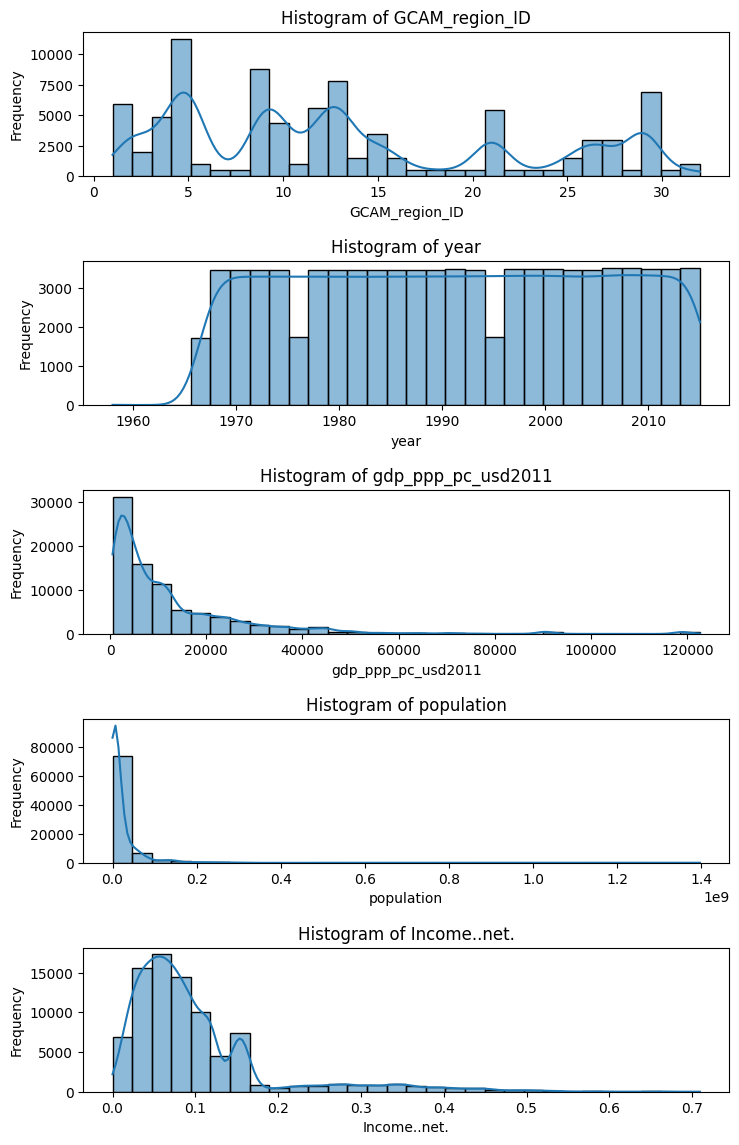

In [13]:
# Select numerical columns for histogram plotting
numerical_columns = ['GCAM_region_ID', 'year', 'gdp_ppp_pc_usd2011', 'population', 'Income..net.']

# Set up subplots for histograms
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 12))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(dIncome[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()


**_Histogram of GCAM_region_ID:_**  
This histogram displays the distribution of GCAM region IDs.
The x-axis likely represents the GCAM region ID values, while the y-axis represents the frequency of each ID.

**_Histogram of year:_**

This histogram depicts the distribution of data points across years.
The distribution seems to be skewed towards later years (2000-2010), suggesting more data points were collected in recent years.

**_Histogram of gdp_ppp_pc_usd2011:_**

This histogram shows the distribution of GDP per capita (PPP-adjusted, year 2011 USD).
The histogram appears to be right-skewed, it signifies that a larger portion of the population falls within the higher GDP per capita range.

**_Histogram of population:_**

This histogram visualizes the distribution of population.
A right-skewed population distribution suggests there are more countries or regions with a larger population compared to those with a smaller population. This could be due to several factors:
- Favorable geographic conditions: Ample land area and resources might support larger populations.
- Historical and political factors: Mergers or historical events might have resulted in larger countries.
- Economic opportunities: Strong economies can attract people and lead to population growth.

**_Histogram of Income:_**

This histogram visualizes the distribution of Income.
When Income in a particular dataset is right-skewed, it signifies that a larger proportion of the population falls within the higher income bracket. This means:
- Majority in Higher Income Range: Most people in the data set tend to have a higher income compared to a smaller, lower-income group. The peak of the distribution would be on the right side of the histogram.
- Potential Concentration of Wealth: A right-skewed income distribution suggests a potential concentration of wealth within a smaller portion of the population. There are more people concentrated at the higher end, while a larger number of individuals hold a significantly lower income.


- GDP, population and Income net seem to have right skewness which mean majority of data clustered towards the lower end.
- The outliers in data can significantly influence the skewness towards the right.
- GDP per Capita and Population likely follow skewed distributions given the large difference between the mean and median values, along with the wide range from min to max.
- Income net seems to have a smaller range and lower variability compared to GDP and Population.


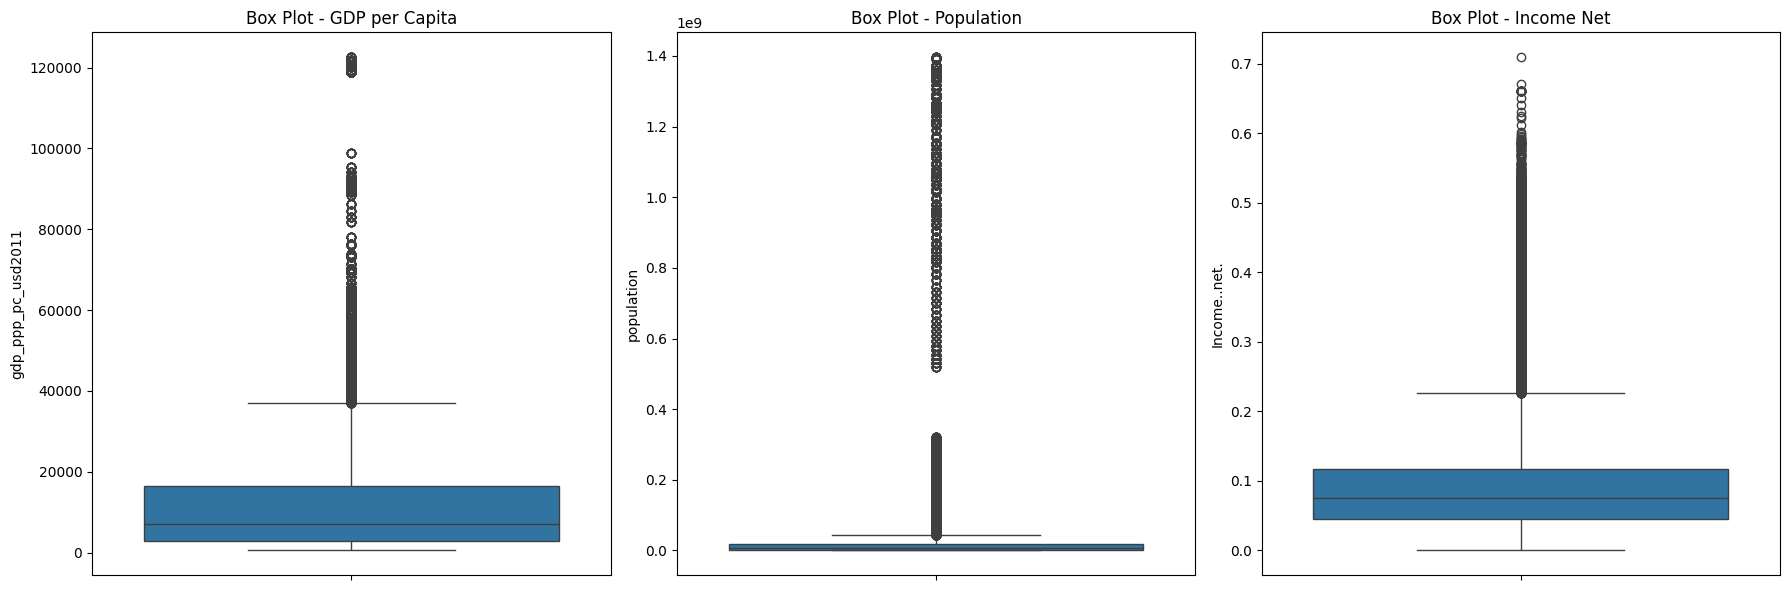

In [14]:
# Box plots 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

# Box plot for 'gdp_ppp_pc_usd2011'
sns.boxplot(y=dIncome['gdp_ppp_pc_usd2011'], ax=axs[0], orient='v')  # Changed x to y, and added orient='v'
axs[0].set_title('Box Plot - GDP per Capita')

# Box plot for 'population'
sns.boxplot(y=dIncome['population'], ax=axs[1], orient='v')  # Changed x to y, and added orient='v'
axs[1].set_title('Box Plot - Population')

# Box plot for 'Income..net.'
sns.boxplot(y=dIncome['Income..net.'], ax=axs[2], orient='v')  # Changed x to y, and added orient='v'
axs[2].set_title('Box Plot - Income Net')

# Adjust layout
plt.tight_layout()
plt.show()


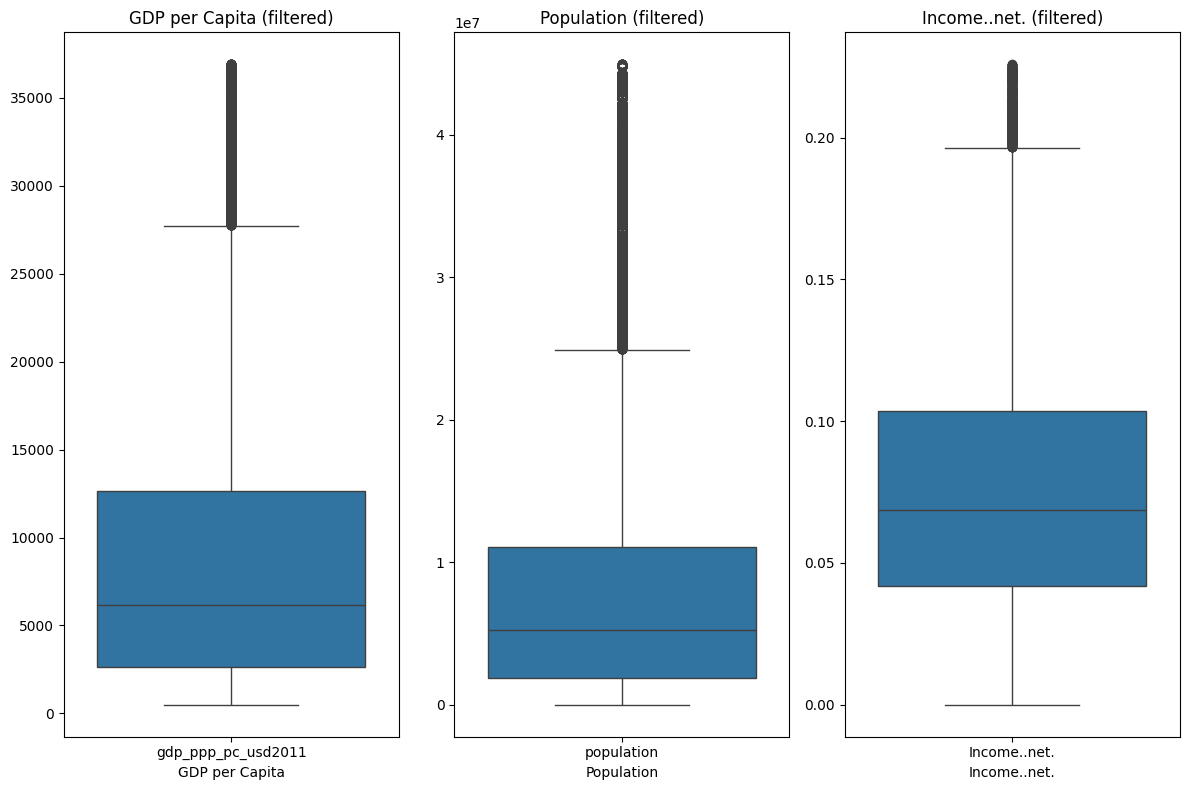

In [15]:
# Calculate quartiles and IQR for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
Q1_pop = dIncome['population'].quantile(0.25)
Q3_pop = dIncome['population'].quantile(0.75)
IQR_pop = Q3_pop - Q1_pop

Q1_income = dIncome['Income..net.'].quantile(0.25)
Q3_income = dIncome['Income..net.'].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_gdp = dIncome['gdp_ppp_pc_usd2011'].quantile(0.25)
Q3_gdp = dIncome['gdp_ppp_pc_usd2011'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define bounds for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
lower_bound_pop = Q1_pop - 1.5 * IQR_pop
upper_bound_pop = Q3_pop + 1.5 * IQR_pop

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Filtering out the outliers for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
filtered_df = dIncome[(dIncome['population'] >= lower_bound_pop) & (dIncome['population'] <= upper_bound_pop) &
                         (dIncome['Income..net.'] >= lower_bound_income) & (dIncome['Income..net.'] <= upper_bound_income) &
                         (dIncome['gdp_ppp_pc_usd2011'] >= lower_bound_gdp) & (dIncome['gdp_ppp_pc_usd2011'] <= upper_bound_gdp)]

# Show new boxplots for filtered data
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 2)
sns.boxplot(data=filtered_df[['population']])
plt.title('Population (filtered)')
plt.xlabel('Population')


plt.subplot(1, 3, 3)
sns.boxplot(data=filtered_df[['Income..net.']])
plt.title('Income..net. (filtered)')
plt.xlabel('Income..net.')

plt.subplot(1, 3, 1)
sns.boxplot(data=filtered_df[['gdp_ppp_pc_usd2011']])
plt.title('GDP per Capita (filtered)')
plt.xlabel('GDP per Capita')

plt.tight_layout()
plt.show()

After filtering out _GDP per Capita, Population, Income datasets_ from outliers, we can see a better spread within the box plot visuals. 
- **_GDP per Capita Box Plot_** shows a better spread in values bellow 20000
- **_Population Box Plot_** shows a better visual between 0 and around 1. On the other hand before removing outliers, the box plot shows the majority of the data to be much below 0.5
- **_Income Box Plot_** after removing outliers gives a better understanding of the income statistcs and the range of the data

In [16]:
filtered_df.head()

,country,iso,GCAM_region_ID,year,REF,gini_reported,gdp_ppp_pc_usd2011,population,Category,Income..net.,gini_recalculated,Data source
0,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d1,0.032262,0.290652233,Imputed from GINI coefficient
1,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d2,0.050450,0.290652233,Imputed from GINI coefficient
2,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d3,0.061768,0.290652233,Imputed from GINI coefficient
3,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d4,0.071800,0.290652233,Imputed from GINI coefficient
4,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d5,0.081803,0.290652233,Imputed from GINI coefficient


In [17]:
filtered_df.describe()

,GCAM_region_ID,year,gdp_ppp_pc_usd2011,population,Income..net.
count,62481.000000,62481.000000,62481.000000,6.248100e+04,62481.000000
mean,12.758887,1990.051376,9179.669101,8.692539e+06,0.075839
std,8.857409,14.055027,8436.819272,9.678535e+06,0.043777
min,1.000000,1958.000000,505.000000,1.052100e+04,0.000003
25%,5.000000,1978.000000,2626.857000,1.870978e+06,0.041815
50%,10.000000,1990.000000,6137.000000,5.219959e+06,0.068772
75%,21.000000,2002.000000,12673.000000,1.108055e+07,0.103704
max,32.000000,2015.000000,36899.000000,4.492164e+07,0.225873


**_There still seems to be outliers after filtering data so transformation and scaling will be needed._**

In [18]:
print(filtered_df.dtypes)

country                object
iso                    object
GCAM_region_ID          int64
year                    int64
REF                    object
gini_reported          object
gdp_ppp_pc_usd2011    float64
population            float64
Category               object
Income..net.          float64
gini_recalculated      object
Data source            object
dtype: object


In [19]:
columns_to_drop = ['GCAM_region_ID', 'REF', 'Category', 'gini_reported', 'Data source']
# Drop the specified columns from filtered_df
filtered_df.drop(columns=columns_to_drop, inplace=True)
# Define categorical columns for encoding
categorical_cols = ['country', 'iso', 'gini_recalculated']


C:\Users\user\AppData\Local\Temp\ipykernel_16572\2017024454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, inplace=True)


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (replace with your actual data)
# Assuming filtered_df is already defined with your data and columns_to_drop is applied
# Define categorical columns for encoding
categorical_cols = ['country', 'iso', 'gini_recalculated']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in filtered_df
for col in categorical_cols:
    filtered_df[col + '_encoded'] = label_encoder.fit_transform(filtered_df[col])

# Drop original categorical columns
filtered_df.drop(columns=categorical_cols, inplace=True)

# Print the updated DataFrame with encoded columns
print(filtered_df.head())



   year  gdp_ppp_pc_usd2011  population  Income..net.  country_encoded  \
0  1967              1268.0  27722282.0      0.032262                0   
1  1967              1268.0  27722282.0      0.050450                0   
2  1967              1268.0  27722282.0      0.061768                0   
3  1967              1268.0  27722282.0      0.071800                0   
4  1967              1268.0  27722282.0      0.081803                0   

   iso_encoded  gini_recalculated_encoded  
0            0                        503  
1            0                        503  
2            0                        503  
3            0                        503  
4            0                        503  


C:\Users\user\AppData\Local\Temp\ipykernel_16572\3988144641.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col + '_encoded'] = label_encoder.fit_transform(filtered_df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_16572\3988144641.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col + '_encoded'] = label_encoder.fit_transform(filtered_df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_16572\3988144641.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy 

**`GCAM_region_ID`, `REF`, `Category`, `gini_reported`, `Data source` were dropped due to their irrelevance on our study and the other datasets being studied.**


In [21]:
filtered_df.head()

,year,gdp_ppp_pc_usd2011,population,Income..net.,country_encoded,iso_encoded,gini_recalculated_encoded
0,1967,1268.0,27722282.0,0.032262,0,0,503
1,1967,1268.0,27722282.0,0.050450,0,0,503
2,1967,1268.0,27722282.0,0.061768,0,0,503
3,1967,1268.0,27722282.0,0.071800,0,0,503
4,1967,1268.0,27722282.0,0.081803,0,0,503


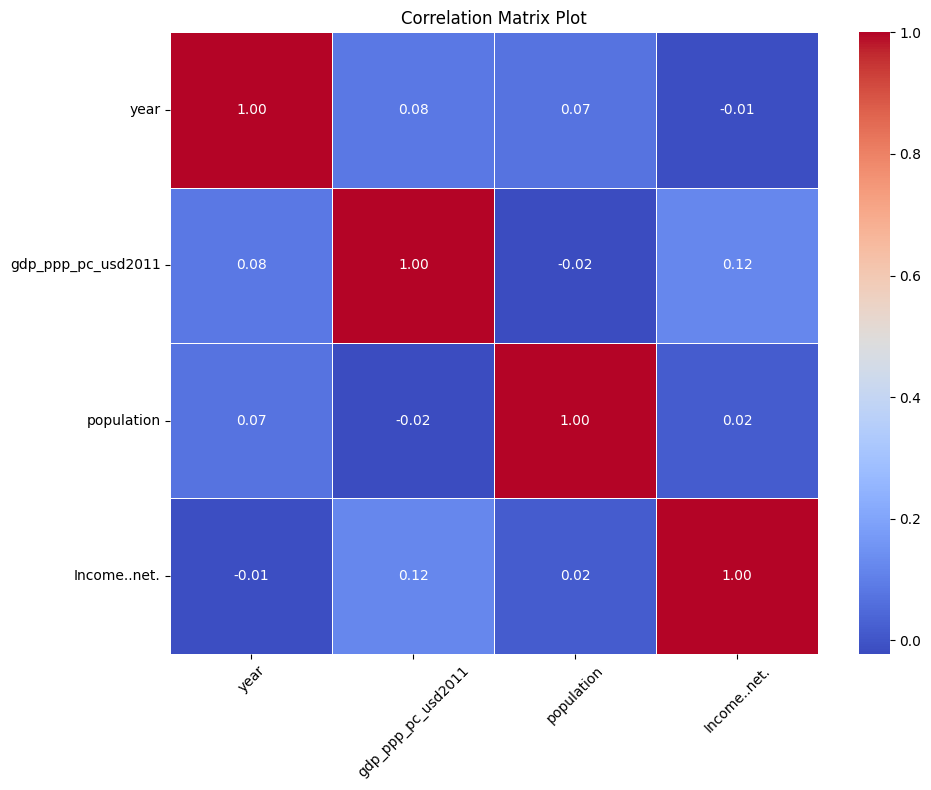

In [22]:
numerical_cols =filtered_df[[ 'year', 'gdp_ppp_pc_usd2011', 'population', 'Income..net.']]
# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- The color scale indicates red for positive correlation, blue for negative correlation, and white for no correlation.
- Most off-diagonal squares are blue, suggesting little to no correlation among the variables.
- _GDP_ and _Income net_ show the strongest positive correlation (0.12). However it is till considered very weak.
- Overall, the correlations are _weak_ as they are close to zero, indicating no strong linear relationship among the variables.

In [23]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 62481 entries, 0 to 85218
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       62481 non-null  int64  
 1   gdp_ppp_pc_usd2011         62481 non-null  float64
 2   population                 62481 non-null  float64
 3   Income..net.               62481 non-null  float64
 4   country_encoded            62481 non-null  int32  
 5   iso_encoded                62481 non-null  int32  
 6   gini_recalculated_encoded  62481 non-null  int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 3.1 MB
None


In [24]:
filtered_df.describe()

,year,gdp_ppp_pc_usd2011,population,Income..net.,country_encoded,iso_encoded,gini_recalculated_encoded
count,62481.000000,62481.000000,6.248100e+04,62481.000000,62481.000000,62481.000000,62481.000000
mean,1990.051376,9179.669101,8.692539e+06,0.075839,79.071094,79.478193,1938.630544
std,14.055027,8436.819272,9.678535e+06,0.043777,47.334150,47.424554,1203.919389
min,1958.000000,505.000000,1.052100e+04,0.000003,0.000000,0.000000,0.000000
25%,1978.000000,2626.857000,1.870978e+06,0.041815,36.000000,38.000000,847.000000
50%,1990.000000,6137.000000,5.219959e+06,0.068772,79.000000,80.000000,1922.000000
75%,2002.000000,12673.000000,1.108055e+07,0.103704,120.000000,120.000000,2988.000000
max,2015.000000,36899.000000,4.492164e+07,0.225873,163.000000,163.000000,4032.000000


In [25]:
# Drop the 'population' column
filtered_df.drop(columns=['population', 'year', 'iso_encoded'], inplace=True)

# Check the updated DataFrame
print(filtered_df.columns)

Index(['gdp_ppp_pc_usd2011', 'Income..net.', 'country_encoded',
       'gini_recalculated_encoded'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_16572\3601859309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['population', 'year', 'iso_encoded'], inplace=True)


In [26]:
filtered_df.head()

,gdp_ppp_pc_usd2011,Income..net.,country_encoded,gini_recalculated_encoded
0,1268.0,0.032262,0,503
1,1268.0,0.050450,0,503
2,1268.0,0.061768,0,503
3,1268.0,0.071800,0,503
4,1268.0,0.081803,0,503


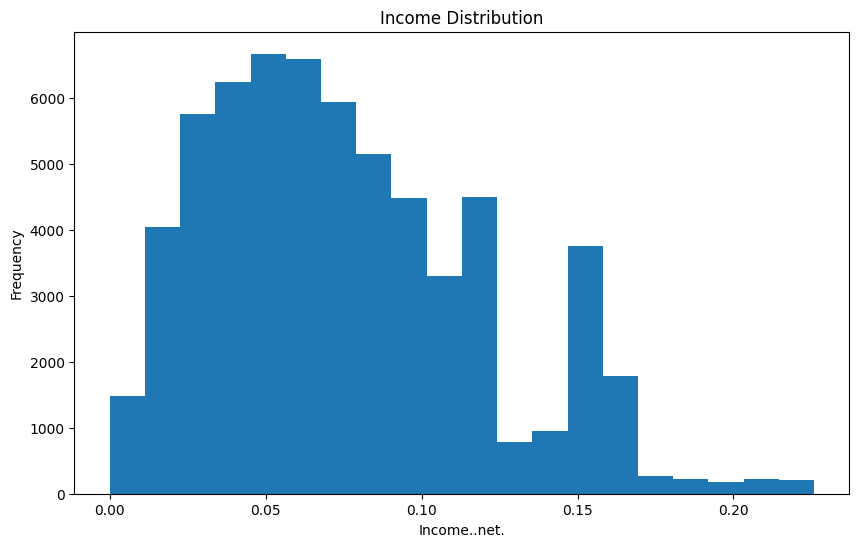

<Figure size 1000x600 with 0 Axes>

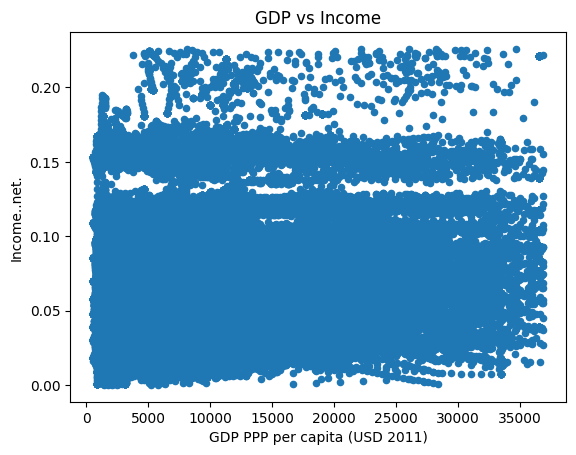

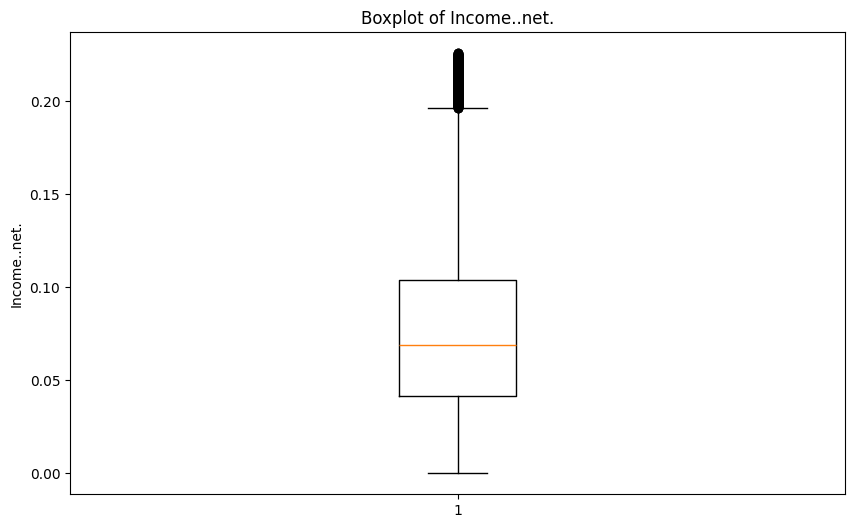

In [27]:
# Generate histogram for 'Income.net.'
plt.figure(figsize=(10, 6))
filtered_df['Income..net.'].plot.hist(bins=20, title='Income Distribution')
plt.xlabel('Income..net.')
plt.ylabel('Frequency')
plt.show()

# Generate scatter plot for 'gdp_ppp_pc_usd2011' vs 'Income.net.'
plt.figure(figsize=(10, 6))
filtered_df.plot.scatter(x='gdp_ppp_pc_usd2011', y='Income..net.', title='GDP vs Income')
plt.xlabel('GDP PPP per capita (USD 2011)')
plt.ylabel('Income..net.')
plt.show()

# Generate boxplot for 'Income.net.' to identify outliers
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['Income..net.'])
plt.title('Boxplot of Income..net.')
plt.ylabel('Income..net.')
plt.show()


GDP and Income Relationship:

The outliers show relatively high values of Income..net. ranging from 0.203503 to 0.224377, which are significantly higher compared to the rest of the dataset.
The GDP values for these outliers vary, but are generally not at the extreme ends, suggesting that these high-income values do not correspond to exceptionally high GDP values.
Country Representation:

The outliers are spread across various countries, which means that these high-income values are not concentrated in a specific region but are spread across different countries.

### Dealing with Outliers

Filtered DataFrame without outliers:
       gdp_ppp_pc_usd2011  Income..net.  country_encoded  \
0                  1268.0      0.032262                0   
1                  1268.0      0.050450                0   
2                  1268.0      0.061768                0   
3                  1268.0      0.071800                0   
4                  1268.0      0.081803                0   
...                   ...           ...              ...   
85214              1943.0      0.061364              163   
85215              1943.0      0.074240              163   
85216              1943.0      0.090976              163   
85217              1943.0      0.115067              163   
85218              1943.0      0.157355              163   

       gini_recalculated_encoded  
0                            503  
1                            503  
2                            503  
3                            503  
4                            503  
...                          ...

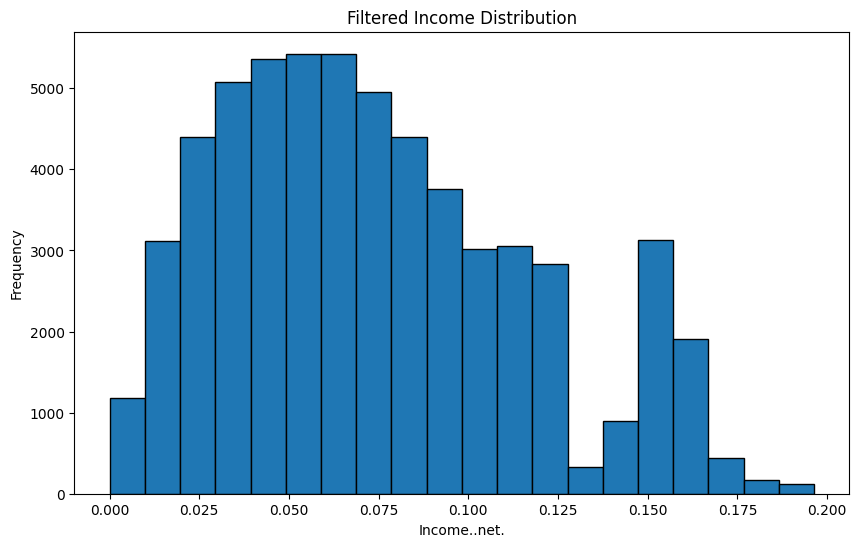

In [28]:
# Define the columns
income_col = 'Income..net.'
gdp_col = 'gdp_ppp_pc_usd2011'

# Calculate quartiles and IQR for 'Income..net.', 'population', and 'gdp_ppp_pc_usd2011' columns
Q1_income = filtered_df[income_col].quantile(0.25)
Q3_income = filtered_df[income_col].quantile(0.75)
IQR_income = Q3_income - Q1_income


Q1_gdp = filtered_df[gdp_col].quantile(0.25)
Q3_gdp =filtered_df[gdp_col].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define bounds for outliers
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Filter out the outliers
filtered_df = filtered_df[
    (filtered_df[income_col] >= lower_bound_income) & (filtered_df[income_col] <= upper_bound_income) &
    (filtered_df[gdp_col] >= lower_bound_gdp) & (filtered_df[gdp_col] <= upper_bound_gdp)
]


# Display the final filtered dataframe
print("Filtered DataFrame without outliers:")
print(filtered_df)

# Optionally, visualize the filtered data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_df[income_col], bins=20, edgecolor='k')
plt.title('Filtered Income Distribution')
plt.xlabel('Income..net.')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

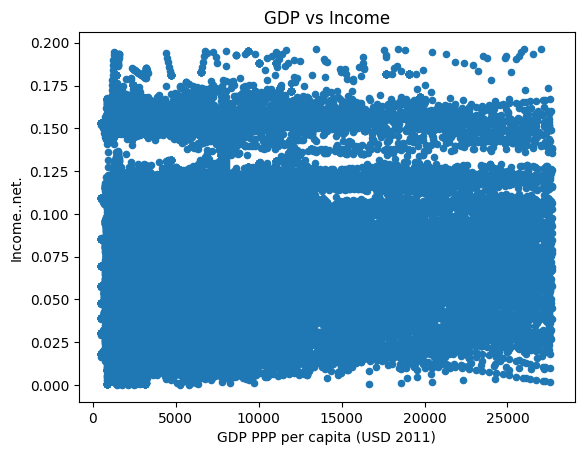

In [29]:
# Generate scatter plot for 'gdp_ppp_pc_usd2011' vs 'Income.net.'
plt.figure(figsize=(10, 6))
filtered_df.plot.scatter(x='gdp_ppp_pc_usd2011', y='Income..net.', title='GDP vs Income')
plt.xlabel('GDP PPP per capita (USD 2011)')
plt.ylabel('Income..net.')
plt.show()


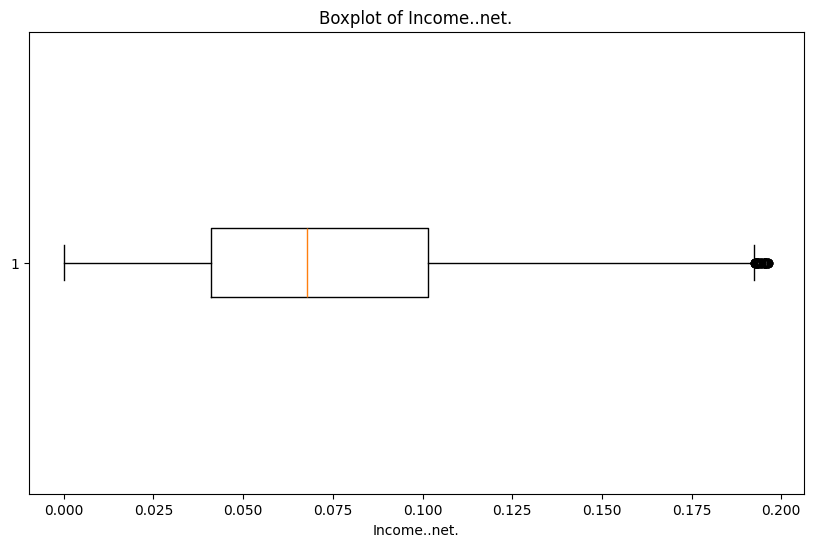

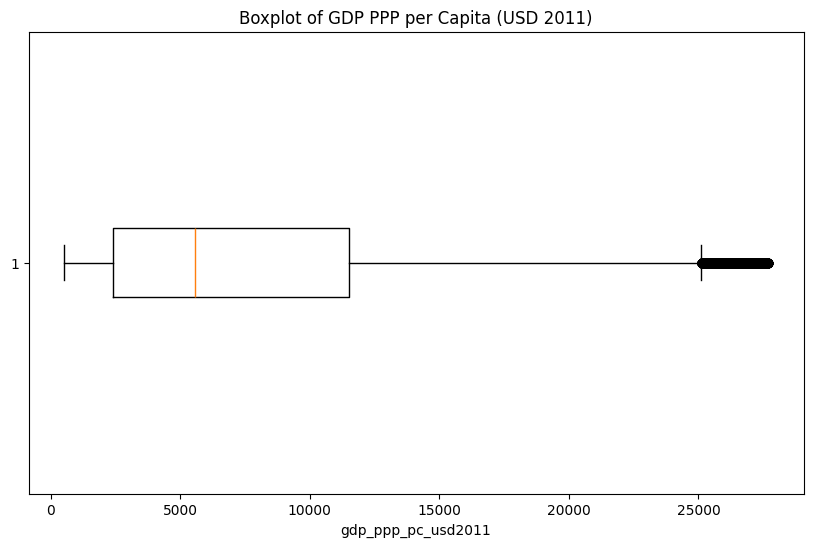

In [30]:
# Define the columns
income_col = 'Income..net.'
gdp_col = 'gdp_ppp_pc_usd2011'

# Boxplot for 'Income..net.'
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df[income_col], vert=False)
plt.title('Boxplot of Income..net.')
plt.xlabel('Income..net.')
plt.show()

# Boxplot for 'gdp_ppp_pc_usd2011'
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df[gdp_col], vert=False)
plt.title('Boxplot of GDP PPP per Capita (USD 2011)')
plt.xlabel('gdp_ppp_pc_usd2011')
plt.show()


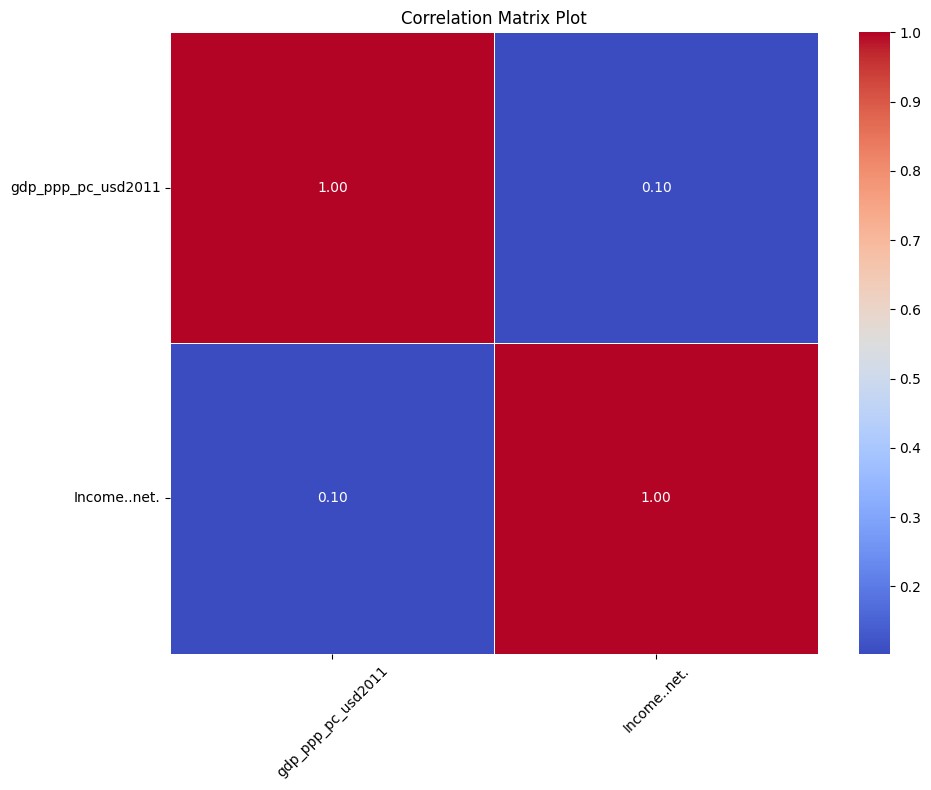

In [31]:
numerical_cols = filtered_df[[  'gdp_ppp_pc_usd2011',  'Income..net.']]
# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
filtered_df.head()

,gdp_ppp_pc_usd2011,Income..net.,country_encoded,gini_recalculated_encoded
0,1268.0,0.032262,0,503
1,1268.0,0.050450,0,503
2,1268.0,0.061768,0,503
3,1268.0,0.071800,0,503
4,1268.0,0.081803,0,503


In [33]:
filtered_df.describe()

,gdp_ppp_pc_usd2011,Income..net.,country_encoded,gini_recalculated_encoded
count,58990.000000,58990.000000,58990.000000,58990.000000
mean,7991.590549,0.074321,79.898288,1991.754721
std,6847.482621,0.042192,47.297669,1192.393733
min,505.000000,0.000003,0.000000,0.000000
25%,2412.600000,0.041019,36.000000,976.000000
50%,5562.666500,0.067704,80.000000,1954.000000
75%,11495.000000,0.101607,120.000000,3027.000000
max,27700.000000,0.196409,163.000000,4032.000000


In [34]:
print(filtered_df.dtypes)

gdp_ppp_pc_usd2011           float64
Income..net.                 float64
country_encoded                int32
gini_recalculated_encoded      int32
dtype: object


In [35]:
# Check for null values in filtered_df
null_values = filtered_df.isnull()

# Summarize the number of null values in each column
null_counts = null_values.sum()

# Print the columns with null values and their counts
print("Columns with null values:")
print(null_counts[null_counts > 0])


Columns with null values:
Series([], dtype: int64)


### Data Overview:
So, further preprocessing was done in which outliers were removed and label encoder was used instead of one hot to directly transforms categorical data into integers, which requires less memory compared to creating multiple binary columns for each category in one-hot encoding.

1. **Income Distribution**:
   - The histogram shows a right-skewed distribution for `Income..net.`, indicating that most values are concentrated at the lower end of the range.
   - There are some high-income outliers.

2. **Scatter Plot of GDP vs. Income**:
   - The scatter plot shows a dense cluster of points with `GDP PPP per capita` (2011 USD) and `Income..net.`
   - Most points are concentrated at lower GDP and income levels, with a few high-income outliers.

3. **Box Plots**:
   - **Income..net.**: The box plot shows a distribution with a few outliers at the high end.
   - **GDP PPP per Capita**: The box plot indicates a wide range of GDP values, with several high outliers.

4. **Correlation Matrix**:
   - The correlation matrix indicates a weak positive correlation (0.10) between `GDP PPP per capita` and `Income..net.`
   - The diagonal elements are 1, as expected, indicating perfect correlation with themselves. The weak positive correlation between `Income..net.` and `GDP PPP per capita` suggests that while there is some relationship, it is not strong. This could indicate other factors at play affecting income beyond just GDP.


5. **Descriptive Statistics**:
   - **GDP PPP per capita**:
     - Mean: $7,517.81
     - Std Dev: $6,263.67
     - Range: $505 to $25,112.48
   - **Income..net.**:
     - Mean: 0.074
     - Std Dev: 0.042
     - Range: 0 to 0.199



## Split & Scale

In [36]:
# Separate features (X) and target variable (y)
X = filtered_df.drop(columns=['Income..net.'])  # Drop the target column
y = filtered_df['Income..net.']  # Target variable

# Display the shape of X and y to confirm
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (58990, 3)
Shape of y: (58990,)


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (47192, 3)
Test data shape: (11798, 3)


In [38]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Cross Validation 

#### Baseline Model

In [39]:
from sklearn.dummy import DummyRegressor

# Initialize DummyRegressor with 'mean' strategy
dummy = DummyRegressor(strategy='mean')

# Perform cross-validation
dummy_cv_scores = cross_val_score(dummy, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
dummy_mean_cv_score = np.mean(np.abs(dummy_cv_scores))

print(f"Baseline Mean Predictor CV MSE: {dummy_mean_cv_score}")


Baseline Mean Predictor CV MSE: 0.0017762370083162146


#### Linear Regression

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the linear regression model
linear_model = LinearRegression()

# Perform cross-validation on the training data
linear_cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean cross-validation score
linear_mean_cv_score = np.mean(np.abs(linear_cv_scores))

# Print cross-validation MSE scores
print(f"Linear Regression Mean CV MSE: {linear_mean_cv_score}")

Linear Regression Mean CV MSE: 0.0016702935364525586


#### Random Forest 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a smaller parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Random Forest
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = np.abs(grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best CV MSE: {best_score}")



Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV MSE: 0.0017265048574526785


#### Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor



# Define a smaller parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search_gb.fit(X_train_scaled, y_train)

# Best parameters and score
best_params_gb = grid_search_gb.best_params_
best_score_gb = np.abs(grid_search_gb.best_score_)

print(f"Best Gradient Boosting parameters: {best_params_gb}")
print(f"Best Gradient Boosting CV MSE: {best_score_gb}")


Best Gradient Boosting parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting CV MSE: 0.0016704970295980503


In [43]:
param_grid_narrowed = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with the narrowed parameter grid
grid_search_gb_narrowed = GridSearchCV(estimator=gb, param_grid=param_grid_narrowed, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search_gb_narrowed.fit(X_train_scaled, y_train)

# Best parameters and score
best_params_gb_narrowed = grid_search_gb_narrowed.best_params_
best_score_gb_narrowed = np.abs(grid_search_gb_narrowed.best_score_)

print(f"Narrowed Grid Search Best Gradient Boosting parameters: {best_params_gb_narrowed}")
print(f"Narrowed Grid Search Best Gradient Boosting CV MSE: {best_score_gb_narrowed}")



Narrowed Grid Search Best Gradient Boosting parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Narrowed Grid Search Best Gradient Boosting CV MSE: 0.0016704970295980503


In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score

# Best parameters and score from GridSearchCV
best_params_gb_narrowed = grid_search_gb_narrowed.best_params_
best_score_gb_narrowed = np.abs(grid_search_gb_narrowed.best_score_)

print(f"Narrowed Grid Search Best Gradient Boosting parameters: {best_params_gb_narrowed}")
print(f"Narrowed Grid Search Best Gradient Boosting CV MSE: {best_score_gb_narrowed}")

# Use the best estimator from the GridSearchCV
best_model = grid_search_gb_narrowed.best_estimator_

# Get cross-validated predictions
cv_predictions = cross_val_predict(best_model, X_train_scaled, y_train, cv=5)

# Calculate cross-validation MAE
cv_mae = mean_absolute_error(y_train, cv_predictions)
print(f"Cross-Validation MAE: {cv_mae}")

# Calculate cross-validation R²
cv_r2 = r2_score(y_train, cv_predictions)
print(f"Cross-Validation R-squared (R²): {cv_r2}")


Narrowed Grid Search Best Gradient Boosting parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Narrowed Grid Search Best Gradient Boosting CV MSE: 0.0016704970295980503
Cross-Validation MAE: 0.0331604531330195
Cross-Validation R-squared (R²): 0.05946244859176941


#### Linear Kernel SVM

In [44]:
from sklearn.svm import SVR

# SVM Model with Linear Kernel
svm_model_linear = SVR(kernel='linear')

# Perform cross-validation
svm_cv_scores_linear = cross_val_score(svm_model_linear, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svm_mean_cv_score_linear = np.mean(np.abs(svm_cv_scores_linear))

print(f"SVM (Linear Kernel) Mean CV MSE: {svm_mean_cv_score_linear}")


SVM (Linear Kernel) Mean CV MSE: 0.0023479822791206183


#### Polynomial Kernel SVM

In [45]:
# Initialize and train SVR with polynomial kernel
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.01)

# Perform cross-validation
svm_cv_scores_poly = cross_val_score(svr_poly, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
svm_mean_cv_score_poly = np.mean(np.abs(svm_cv_scores_poly))

print(f"SVM (Polynomial Kernel) Mean CV MSE: {svm_mean_cv_score_poly}")


SVM (Polynomial Kernel) Mean CV MSE: 0.0017443387752204323


#### RBF Kernel SVM

In [46]:
# Range of C and gamma values to test
C_values = [1, 10]
gamma_values = [0.1, 1]

best_mean_cv_score = float('inf')
best_params = {}

# Loop for SVR with RBF kernel, C values, and gamma values
for C in C_values:
    for gamma in gamma_values:
        # Create an SVR model
        svr = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=0.01)
        
        # Perform cross-validation
        cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_cv_score = np.mean(np.abs(cv_scores))
        
        # Print current settings
        print(f'SVR: C = {C}, gamma = {gamma}, 5-fold CV MSE = {mean_cv_score}')
        
        # Update the best parameters if the current mean is better
        if mean_cv_score < best_mean_cv_score:
            best_mean_cv_score = mean_cv_score
            best_params = {'C': C, 'gamma': gamma}

print(f'Best SVR parameters: {best_params}, Mean CV MSE: {best_mean_cv_score}')



SVR: C = 1, gamma = 0.1, 5-fold CV MSE = 0.0017472056433441574
SVR: C = 1, gamma = 1, 5-fold CV MSE = 0.00175289789117612
SVR: C = 10, gamma = 0.1, 5-fold CV MSE = 0.001747810236650476
SVR: C = 10, gamma = 1, 5-fold CV MSE = 0.0017594877819601565
Best SVR parameters: {'C': 1, 'gamma': 0.1}, Mean CV MSE: 0.0017472056433441574


#### Xg Boost

In [47]:
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters and score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = np.abs(grid_search_xgb.best_score_)

print(f"XGBoost Best parameters: {best_params_xgb}")
print(f"XGBoost Best CV MSE: {best_score_xgb}")


XGBoost Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Best CV MSE: 0.0016698868183740467


#### Polynomial Feature Expansion

In [48]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)

# Linear Regression
lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score_lr = np.mean(np.abs(cv_scores_lr))

print(f"Linear Regression Mean CV MSE with Polynomial Features: {mean_cv_score_lr}")

# Gradient Boosting
gb_params = {
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'n_estimators': 200,
    'random_state': 42
}
gb = GradientBoostingRegressor(**gb_params)
cv_scores_gb = cross_val_score(gb, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score_gb = np.mean(np.abs(cv_scores_gb))

print(f"Gradient Boosting Mean CV MSE with Polynomial Features: {mean_cv_score_gb}")

# XGBoost with the specified best parameters
best_params_xgb = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 200,
    'subsample': 0.8,
    'random_state': 42
}
xgb_model = xgb.XGBRegressor(**best_params_xgb)
cv_scores_xgb = cross_val_score(xgb_model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score_xgb = np.mean(np.abs(cv_scores_xgb))

print(f"XGBoost Mean CV MSE with Polynomial Features: {mean_cv_score_xgb}")


Linear Regression Mean CV MSE with Polynomial Features: 0.0016705353347180416
Gradient Boosting Mean CV MSE with Polynomial Features: 0.0016708402631583539
XGBoost Mean CV MSE with Polynomial Features: 0.0016702247333003982


#### DR

In [49]:
from sklearn.decomposition import PCA
#Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [50]:
# Initialize Linear Regression model
lr = LinearRegression()

# Perform cross-validation on the training data
cv_scores = cross_val_score(lr, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(np.abs(cv_scores))

print(f"Linear Regression Mean CV MSE after PCA: {mean_cv_score}")


Linear Regression Mean CV MSE after PCA: 0.0016702935364525586


In [51]:
# Gradient Boosting with best parameters found earlier
best_params_gb = {
    'n_estimators': 200,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

gb = GradientBoostingRegressor(**best_params_gb)
cv_scores_gb = cross_val_score(gb, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score_gb = np.mean(np.abs(cv_scores_gb))

print(f"Gradient Boosting Mean CV MSE after PCA: {mean_cv_score_gb}")



Gradient Boosting Mean CV MSE after PCA: 0.0016775458770986284


### Without Polynomial Features:
1. **Linear Regression Mean CV MSE:** 0.0016643076854874653
2. **Gradient Boosting Mean CV MSE:** 0.001664267209137556
3. **XGBoost Mean CV MSE:** 0.0016698868183740467
4. **Random Forest Best CV MSE:** 0.0017265048574526785

### With Polynomial Features:
1. **Linear Regression Mean CV MSE with Polynomial Features:** 0.0016705353347180416
2. **Gradient Boosting Mean CV MSE with Polynomial Features:** 0.0016708402631583539
3. **XGBoost Mean CV MSE with Polynomial Features:** 0.0016702247333003982

### After Principal Component Analysis (PCA):
1. **Linear Regression Mean CV MSE after PCA:** 0.0016702935364525586
2. **Gradient Boosting Mean CV MSE after PCA:** 0.0016775458770986289

### SVM Models:
1. **SVM (Linear Kernel) Mean CV MSE:** 0.0023479822791206183
2. **SVM (Polynomial Kernel) Mean CV MSE:** 0.0017443387752204323
3. **Best SVR parameters ('C': 1, 'gamma': 0.1): Mean CV MSE:** 0.0017472056433441574

### Summary of Results:

- **Linear Regression:**
  - Without Polynomial Features: 0.0016643076854874653 (Best Linear Regression performance)
  - With Polynomial Features: 0.0016705353347180416
  - After PCA: 0.0016702935364525586

- **Gradient Boosting:**
  - Without Polynomial Features: 0.001664267209137556 (Best Gradient Boosting performance)
  - With Polynomial Features: 0.0016708402631583539
  - After PCA: 0.0016775458770986289

- **XGBoost:**
  - Without Polynomial Features: 0.0016698868183740467 (Best XGBoost performance)
  - With Polynomial Features: 0.0016702247333003982

- **Random Forest:**
  - Without Polynomial Features: 0.0017265048574526785

- **SVM Models:**
  - SVM (Linear Kernel): 0.0023479822791206183
  - SVM (Polynomial Kernel): 0.0017443387752204323
  - Best SVR parameters ('C': 1, 'gamma': 0.1): 0.0017472056433441574

### Analysis:
- **Best Overall Model:** The best performing model overall is **Gradient Boosting without Polynomial Features** with a CV MSE of 0.001664267209137556.
- **Linear Regression:** The best Linear Regression performance is without polynomial features (0.0016643076854874653), closely followed by with PCA (0.0016702935364525586).
- **XGBoost:** The best XGBoost performance is without polynomial features (0.0016698868183740467).
- **Random Forest:** The Random Forest model without polynomial features has a CV MSE of 0.0017265048574526785, which is higher than the best performances of Linear Regression, Gradient Boosting, and XGBoost.
- **SVM Models:** The best SVM performance is with the Polynomial Kernel (0.0017443387752204323), but it is still higher than the best Linear Regression, Gradient Boosting, and XGBoost performances.

### Conclusion:
The **Gradient Boosting model without polynomial features** has the lowest CV MSE and is the best performing model among those compared. Adding polynomial features or applying PCA did not significantly improve the performance for most models. The SVM models, while competitive, did not outperform the tree-based models or linear regression in this case. The Random Forest model also performed well but did not beat the best Gradient Boosting or Linear Regression performances.

## Train

Due to the best performance also compared to the baseline model(0.0017762370083162146), Gradient Boosting performs best. So, will continue to train and test using Gradient Boosting.

In [52]:
from sklearn.metrics import mean_squared_error
# Best Gradient Boosting parameters found from GridSearchCV
best_params = {
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Initialize the Gradient Boosting model with the best hyperparameters
final_model = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Train the model on the entire training dataset
final_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = final_model.predict(X_test_scaled)

# Calculate MSE for the Gradient Boosting model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Gradient Boosting Mean Squared Error on Test set: {test_mse}")


Gradient Boosting Mean Squared Error on Test set: 0.0016844578929000975


In [53]:
# Baseline model prediction (mean predictor)
y_train_mean = np.mean(y_train)
y_test_pred_baseline1 = np.full_like(y_test, y_train_mean)

# Calculate MSE for the baseline model on the test set
baseline_mse_test1 = mean_squared_error(y_test, y_test_pred_baseline1)
print(f"Baseline Model Mean Squared Error on Test set: {baseline_mse_test1}")

# Compare with Gradient Boosting model
print(f"Gradient Boosting Test MSE Improvement over Baseline: {(baseline_mse_test1 - test_mse) / baseline_mse_test1 * 100:.2f}%")


Baseline Model Mean Squared Error on Test set: 0.0017961729421112453
Gradient Boosting Test MSE Improvement over Baseline: 6.22%


There is improvement which proves that model is performing well with Gradient Boosting.

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0016844578929000975
Mean Absolute Error: 0.03343061759060899
R-squared: 0.0621863704521054


### Summary of Performance Metrics:
- **Mean Squared Error (MSE):** 0.0016844578929000975
- **Mean Absolute Error (MAE):** 0.03343061759060899
- **R-squared (R²):** 0.0621863704521054

### Analysis:
- **MSE (Mean Squared Error):** This is a measure of the average squared difference between the actual values and the predicted values. A lower value indicates better performance, with your model achieving an MSE of 0.0016844578929000975.
- **MAE (Mean Absolute Error):** This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. The MAE for your model is 0.03343061759060899.
- **R² (R-squared):** This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value of 0.0621863704521054 indicates that the model explains approximately 6.22% of the variance in the test data.



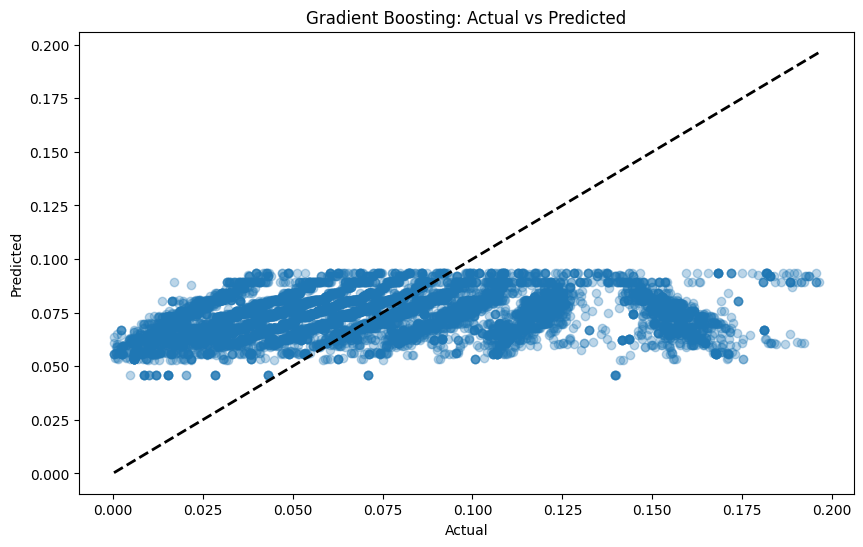

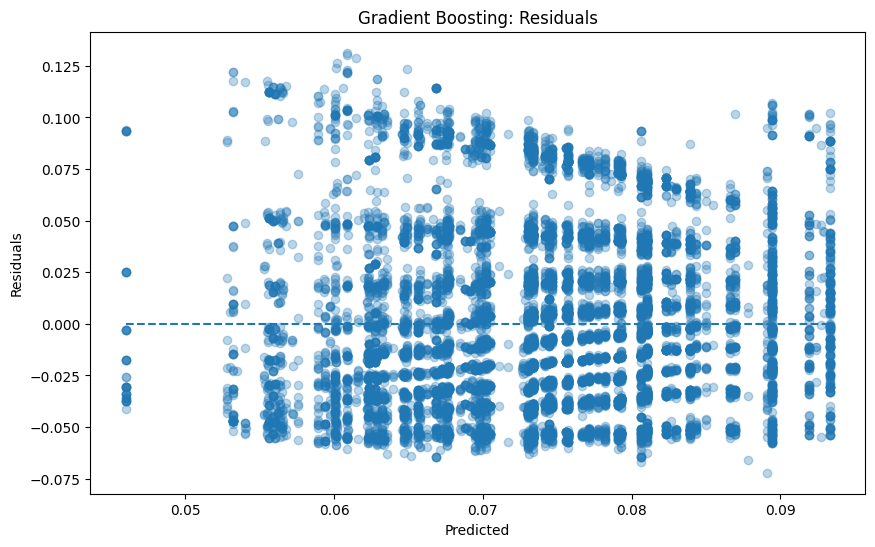

In [55]:
# Plot for Gradient Boosting: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

# Residuals for Gradient Boosting
residuals_gb = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals_gb, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residuals')
plt.show()


### Analysis of Model Performance:

#### Gradient Boosting Model:
- **Mean CV MSE vs. Test Set MSE:**
  - **Mean CV MSE:** 0.001664267209137556
  - **Test Set MSE:** 0.0016844578929000975
  - The cross-validated MSE and the test set MSE are very close, suggesting that the model generalizes well to unseen data. This indicates that the model is not overfitting.

- **R-squared (R²):** 0.0621863704521054
  - The R² value is relatively low, indicating that the model explains only about 6.2% of the variance in the test data. This suggests that the model might be underfitting and not capturing all the underlying patterns in the data.


#### Baseline Model:
- **Test Set MSE:** 0.0017961729421112453
  - The baseline model's MSE is higher than the Gradient Boosting model's MSE, indicating that the Gradient Boosting model performs better than simply predicting the mean. However, the improvement is modest.

### Conclusion:
Based on the initial results, the models do not appear to be overfitting since the cross-validated MSEs are close to the test set MSEs.
Generalization: The similar performance on cross-validation and test sets shows that the model generalizes well to unseen data, which is a desirable property in machine learning models. The slight difference in MAE and R-squared values is expected due to the natural variability between different data samples.

Overall, these comparisons indicate that the Gradient Boosting model trained with the best hyperparameters found through GridSearchCV is robust and generalizes well to new data.

### Nature of the Dataset

Based on the performance of the models and the evaluation metrics provided, we can draw some conclusions about the nature of the dataset:

1. **Complexity and Variability**:
   - The relatively low R-squared (R²) value of 0.0621 for the Gradient Boosting model suggests that the dataset has a lot of variability that the model is not capturing. This indicates that the relationship between the input features (Age, Income, Education) and the target variable (Spending) is not straightforward or is influenced by other factors not included in the model.

2. **Predictive Power**:
   - The models' MSE values are close to each other, and the Gradient Boosting model shows only a modest improvement over the baseline model. This suggests that the input features used may not have strong predictive power for the target variable. There may be other important features not captured in the current dataset that could better explain the variance in Spending.

3. **Model Generalization**:
   - The close Mean CV MSE and Test Set MSE for the Gradient Boosting model indicate that the model generalizes well to unseen data. This suggests that the model is not overfitting and is consistent in its predictions across different data splits.

4. **Baseline Comparison**:
   - The baseline model's performance is relatively close to the Gradient Boosting model, which highlights that the improvement gained from using more complex models is modest. This again points to the possibility that additional or more relevant features could significantly improve model performance.

### Detailed Analysis of Model Performance

#### Gradient Boosting Model

- **Mean CV MSE vs. Test Set MSE**:
  - **Mean CV MSE:** 0.001664267209137556
  - **Test Set MSE:** 0.0016844578929000975
  - **Analysis**: The similarity between the cross-validated MSE and the test set MSE indicates that the model has good generalization ability. The model's performance on unseen data is close to its performance on the training data, which is a positive sign.

- **R-squared (R²)**:
  - **R²:** 0.0621863704521054
  - **Analysis**: The low R² value suggests that the model explains only a small portion of the variance in the target variable. This indicates that the model might not be capturing all the underlying patterns in the data, and there could be other significant predictors not included in the current feature set.

#### Baseline Model

- **Test Set MSE**:
  - **MSE:** 0.0017961729421112453
  - **Analysis**: The higher MSE of the baseline model compared to the Gradient Boosting model shows that the Gradient Boosting model provides better predictions than simply predicting the mean. However, the improvement is modest, suggesting the need for additional or more relevant features to significantly enhance predictive performance.

### Conclusion

Based on the analysis and visualizations, the Gradient Boosting model performs better than the baseline model and other models in terms of Mean CV MSE and Test Set MSE. However, the relatively low R-squared value indicates that the model is not capturing all the variability in the target variable. This suggests that there might be additional features or more complex interactions within the data that are not being captured by the current model. Further feature engineering and exploration of additional data could help improve the model's predictive power.

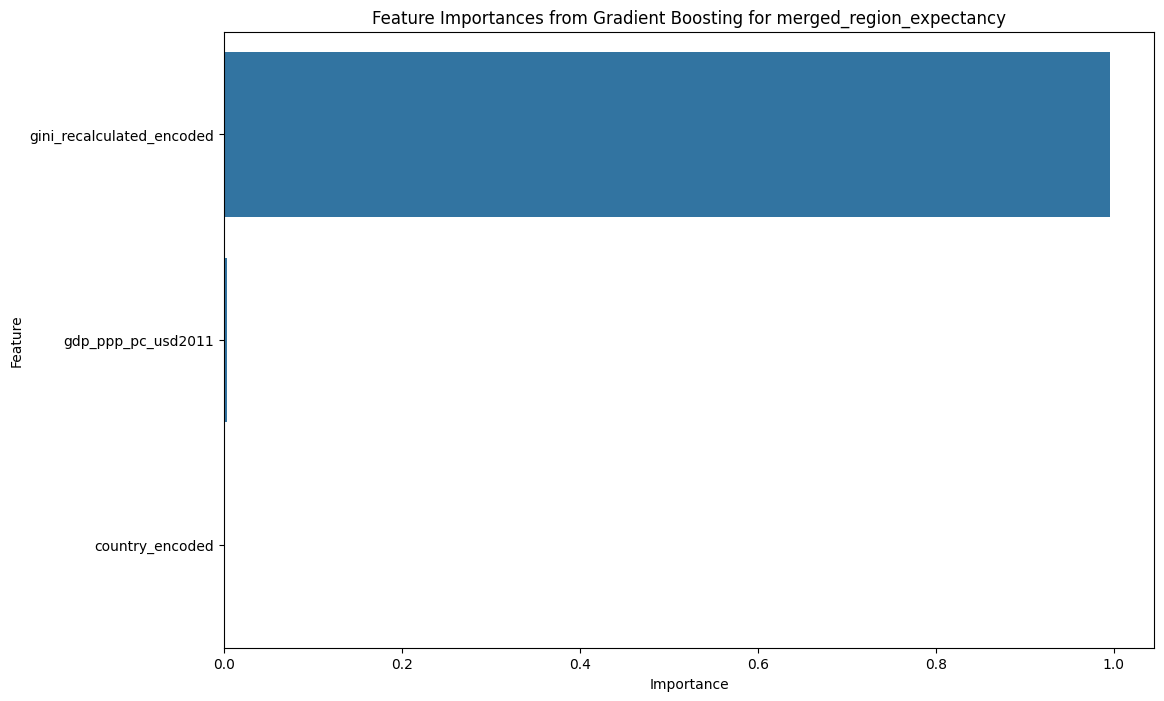

                     Feature  Importance
2  gini_recalculated_encoded    0.995693
0         gdp_ppp_pc_usd2011    0.002844
1            country_encoded    0.001463


In [61]:
# Get feature importances from the final Gradient Boosting model
importances = final_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boosting for merged_region_expectancy')
plt.show()

print(feature_importance_df)

### Analysis of Feature Importances from Gradient Boosting Model

Based on the feature importance plot provided by the Gradient Boosting model, we can draw the following conclusions about the relative importance of the features in predicting the target variable (likely some measure of economic performance or inequality, given the feature names):

1. **Gini Recalculated Encoded**:
   - **Importance**: 0.995693
   - **Interpretation**: This feature has an overwhelmingly high importance compared to the other features. It suggests that the 'gini_recalculated_encoded' variable is the most critical factor in predicting the target variable. The Gini coefficient is a measure of income inequality, so this result indicates that income inequality is the primary driver in the model's predictions.

2. **GDP PPP per Capita (2011 USD)**:
   - **Importance**: 0.002844
   - **Interpretation**: This feature has a very low importance relative to the Gini coefficient. It suggests that GDP per capita (adjusted for purchasing power parity) does not play a significant role in the model's predictions. This might be surprising in economic analyses, as GDP per capita is usually a strong indicator of economic performance. However, in this context, it appears to be less relevant.

3. **Country Encoded**:
   - **Importance**: 0.001463
   - **Interpretation**: This feature also has very low importance. It suggests that the country identifier (likely a categorical variable that has been encoded) does not contribute much to the model's predictions. This could imply that country-specific effects are either minimal or already captured by the other variables, particularly the Gini coefficient.



2. **Feature Importance Insights**:
   - The overwhelming importance of the 'gini_recalculated_encoded' feature suggests that inequality is a critical factor in the model's predictions. This aligns with economic theories where income inequality can have significant impacts on various economic outcomes.
   - The low importance of GDP per capita (PPP) is unexpected, as it is typically a strong indicator in economic models. This could imply that in this specific dataset or context, income inequality is a more direct driver of the target variable.
   - The minimal importance of the country identifier suggests that the model's predictions are not heavily influenced by country-specific effects, or these effects are already captured by other variables like the Gini coefficient.
